## Altering Beta

#### modification of valle 2013 (also similar to type I functional response)  
$\beta = (e^{kd\frac{d}{d+h}}) c_r  \epsilon $  

Modifications:  
Valles uses number of transmission events per unit time  x duration of a contact    
I have ignored susceptibility as no vacccinations   
I have added f here  
I have also just used exponential instead of 1-exponential

#### Parameters

$S/N$ is proportion of susceptibles  
$S/NG$ is density proportion of susceptibles    
d is average contact duration of a contact (days)    
k is growth per day (negative)- (1/day)  
c_R is contacts per day  (individuals/(individual x day)  
h is contact length for infection needed (days)   
S is no of susceptibles  (individuals)  
I is no of infectives     (individuals)  
N is pop size (individuals)   
$\epsilon$ is maximum infectivity (eg maximum of 50% of contacts can lead to infections)  

 





#### plan with climate:  
k is just S  
social behaviour- d, c_R and h could all be affected by climate

[1] 0.8570128

[1] 8.570128

[1] 8.485275

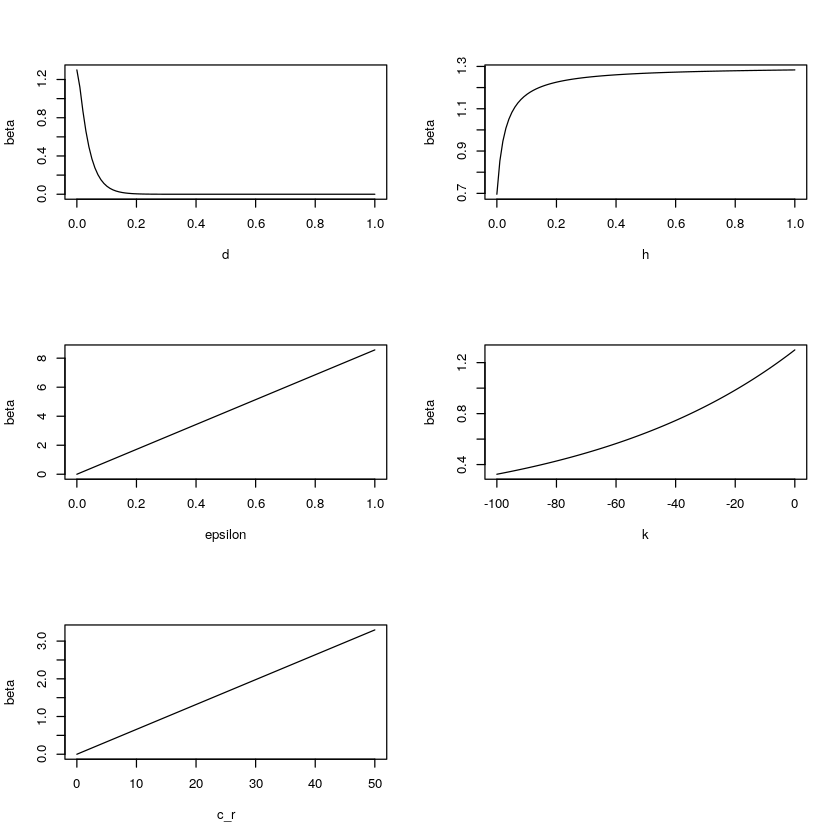

In [113]:

#issue with this - k not perfect 
#this makes the most sense of anything I've done so far!
S<-1000 # individuals
I<-10#individuals
N<-( S + I )


d<- 0.5 / 24  #units -time(days)
h<-0.25 / 24 #days
epsilon<-0.1 # maximum possibly transmissibility . not all contacts. eg in school
k<- -30  #decay (1/day)
c_r<-13 #individuals/individual/day  

beta = ( ( exp ( k * d * ( d / ( h + d ) ) ) ) *   epsilon   * c_r)
betaI = beta * I 
betaf = beta * I * ( S / N)

beta
betaI
betaf




parms = list(
d= 0.5 / 24,  #units -time(days)
h=0.25 / 24, #days
epsilon=0.1, # maximum possibly transmissibility . not all contacts. eg in school
k= -30,  #decay (1/day)
c_r=13
) #individuals/individual/day  
    
par(mfrow = c(3, 2))
for (i in 1:(length(parms))) {
  parmschange<- parms 
    if (i != length(parms)) {
    x <- seq(0, 1, length.out = 100)
        if (i == 4){
            x<- -100*x
        }
  } else{
    x <- seq(0, 50, length.out = 100)
  }
 
    parmschange[[i]] <- x
    beta = (exp(parmschange[["k"]] * parmschange[["d"]] * ( parmschange[["d"]] / ( parmschange[["h"]] +
        parmschange[["d"]] )  ) ) )*   parmschange[["epsilon"]]   * parmschange[["c_r"]]

    #beta = ( (   ( parmschange[["k"]] * parmschange[["d"]] * ( parmschange[["d"]] / 
     #   ( parmschange[["h"]] + parmschange[["d"]] ) ) ) ) *   parmschange[["f"]]   * parmschange[["c_r"]])
    plot(x, beta, type = "l", xlab = names(parms[i]))
}




In [114]:
library(socialmixr)
data("polymod")
data <- polymod$contacts
contact_table <- table(data$part_id, data$duration_multi)
#seems to be shifted 
del <- as.numeric(names(which(contact_table[, 1] > 0)))
data <- data[which(data$part_id != del), ]
contact_table <- table(data$part_id, data$duration_multi)
con <- as.matrix(contact_table)
midpoints <- c(2.5, 10, 15 + (60 - 45) / 2, 150, 4 * 60)
time <- midpoints * con / 60

timebyrow <- apply(time, 1, sum)
meancont<-mean(timebyrow)
maxcont<-meancont+2*sqrt(var(timebyrow))

#max(timebyrow)
#min(timebyrow)
timebyrow <- rowSums(con)
meancontactno<-mean(timebyrow)
varcontactno<-var(timebyrow)

#most frequently- 4h+ so est 4h?

In [115]:
#R and S functions- for making quadratic and normal function
mortality_quadratic <- function(vertex , point , T_range, scaled_type) {
     
   #vertex is the maxima or minima, point is another point on the curve (usually min o)
   #scaled between 0 and 1 
   #finds a b and c
   #remember that applies only to T_range
   #find coefficients 
  
  
   a = ((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) 
   b = (((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) * -2 * vertex[1]) 
   c = (((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) * vertex[1] ^2 + vertex[2]) 
   if (scaled_type==1){
       T = seq(T_range[1], T_range[2] , length.out = 1000)
       M =  ((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) * (T - vertex[1]) ^2 + vertex[2]
       c = c  - min(M) 
       }
   if (scaled_type==2){
       T = seq(T_range[1], T_range[2] , length.out = 1000)
       M =  ((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) * (T - vertex[1]) ^2 + vertex[2]
       a = a / (max(M) - min(M))
       b = b / (max(M) - min(M))
       c = (c  - min(M)) / (max(M) - min(M))
   } 
   #find scaled M and plot 
   #M = (M - min(M)) / (max(M) - min(M))
   #plot(T,M,type="s")
   return(c(a, b, c))
}
# if type of standard deviation (stype) ==1 then use upper to find s ,else use lower. 
#This is to solve the issue that if maximum occurs at upper confidence interval, s will be 0. 





In [116]:
par(mfrow=c(2,1))
#parameters for d
max_mean_contact<-4/24
confidence_interval<-c(-10,40)

T_range<-seq(-30,60,length.out = 1000)


#function for contact rate
cr <- function(T, m,s) {
#   #finds equation given coordinates at maximum (m) temp and standard deviation
   scaling = sqrt(2 * pi) * s * m[2]
    #uses equation to find contact duration at given T values 
   #need to work on c means, if c=T here then doesn't work because not enough density???- think this issue is solved with stype
   return(scaling*(1 / (sqrt(2 * pi) * s))*exp((-(T - m[1]) ^ 2) / (2 * s^ 2)))
}

#function for mean duration of contact
mean_duration_normal <- function(m , c, T_range, stype) {
    #parameters
    T = seq(T_range[1], T_range[2], length.out = 10000)
    c_u = c[2]
    c_l = c[1]
    m_T = m[1]
    m_d = m[2]
    #find s
    if (stype==1){
       s = (c_u - m_T) / 1.96
       }else{
          s = -(c_l - m_T) / 1.96
       }
  #find y acis of normal distribution given s   
   #N_D =  (1 / (sqrt(2 * pi) * s)) *  exp((-(T - m_T) ^ 2) / (2 * s ^ 2))
   #d = N_D * sqrt(2 * pi) * s
     scaling = sqrt(2 * pi) * s * m_d
 
   #plot(T,d)
   return(c(scaling, m_T, s))
}

mean_duration <- function(T, m, c, T_range,stype) {
#   #finds equation given coordinates at maximum (m), upper and lower confidence interval (c), and range of T, and stype
   eq <- mean_duration_normal(m, c, T_range,stype)#

    #uses equation to find contact duration at given T values 
   #need to work on c means, if c=T here then doesn't work because not enough density???- think this issue is solved with stype
   return(eq[1]*(1 / (sqrt(2 * pi) * eq[3]))*exp((-(T - eq[2]) ^ 2) / (2 * eq[3] ^ 2)))
}




d <- function(temp_at_max, range, T) {
   #finds the equation fiven temp_at_max and range. then finds S for given T
   #uses where temp at max relates to range to determine stype (to determine whether lower or upper value of range is used to find SI)
   if (abs(temp_at_max-range[1])>abs(temp_at_max-range[2])){
      stype=0
      }else{
         stype=1
      }
   #finds d at T values for given parameters (contact finds equation using duration_normal_scaled)
   #t_range not strictly needed 
   return(mean_duration(T = T,m = c(temp_at_max, max_mean_contact), c = confidence_interval, T_range = range, stype=stype))

   
}



In [117]:
#setting parameters 
#S
max_survival<- 0
min_survival<--40
#scaling_S<-2 #scaled between 0 and 1 
#scaling_S<-1 # made positive but not scaled
scaling_S<-0 # basic quadratic

Survival <- function(T, vertex, T_range, point ) {
    # uses function to make mortality function to find the survival for a given value of T 
    # this is a seperate function to the mortality quadratic scaled function becase finds a specific T value from that function
    eq <- mortality_quadratic(vertex, point, T_range, scaled_type=scaling_S)  
    return(eq[1] * T ^ 2 + eq[2] * T + eq[3])
}

S <- function(temp_at_max, range, T) {
   #this function uses the temp at max and range to decide which end of range to allocate as minimum.
   #then finds the equation for the given range and temp at max and finds S for given T 
   #uses specific min and max y values. should probably move that to input
    
   # the temp at min is the lower end of the range when the temp at max is closer to the upper end of the range and vice versa
   #this is because the quadratic is symmetric and bounded     
   if (temp_at_max > (range[2] - range[1]) / 2) {
       temp_at_min <- range[1]
      }else{
        temp_at_min <- range[2]
      } 
    #outputs y value for temperature when vertexc, T_range and point are at values here
    return(Survival(T = T, vertex = c(temp_at_max, max_survival),T_range = range, point = c(temp_at_min, min_survival)))
}




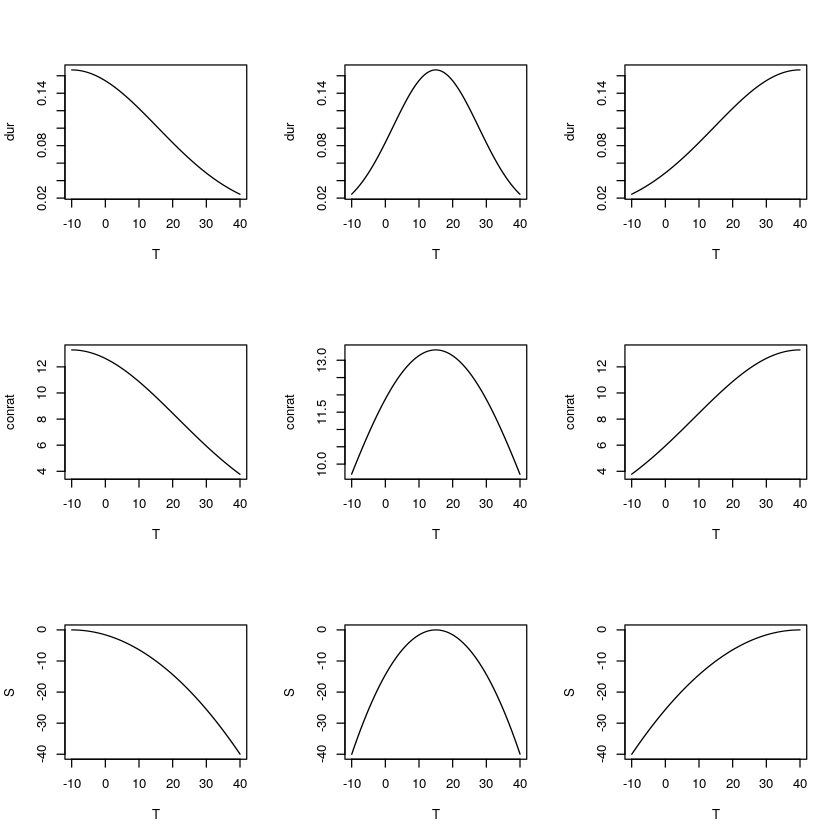

In [118]:
par(mfrow=c(3,3))
plotting_d <- function(maxvec, range) {
   #plots for different maximum temperatures
   T = seq(range[1], range[2] , length.out = 1000)
   for (i in maxvec) {
       #uses the value of maxvec to "decide" stype(decide whether lower or upper confidence interval is used to calculate standard deviation)
 #     #find C and plot given specific parameters
       dur= d(T = T, range=range, temp_at_max = i)
      plot(T, dur, type = "S")
   } 
    }
plotting_d(maxvec = c(-10, 15, 40), range = c(-10, 40))

plotting_cr <- function(maxvec, range) {
   #plots for different maximum temperatures
   T = seq(range[1], range[2] , length.out = 1000)
   for (i in maxvec) {
       #uses the value of maxvec to "decide" stype(decide whether lower or upper confidence interval is used to calculate standard deviation)
 #     #find C and plot given specific parameters
      conrat=cr(T,m=c(i,meancontactno),s=sqrt(varcontactno)*3)
      plot(T, conrat, type = "S")
   } 
    }
plotting_cr(maxvec = c(-10, 15, 40), range = c(-10, 40))

plottingS <- function(maxvec, range) {
  #plots for different maximum temperatures 
   T = seq(range[1], range[2] , length.out = 1000)
   for (i in maxvec) {
      temp_at_max <- i
      # the temp at min is the lower end of the range when the temp at max is closer to the upper end of the range and vice versa
      #this is because the quadratic is symmetric and bounded    
      if (i > (range[2] - range[1]) / 2) {
         temp_at_min <- range[1]
         }else{
            temp_at_min <- range[2]
         }
      #survival function finds equation given vertex, trange and point, then finds S for chosen T values  
      S= Survival(T = T, vertex = c(temp_at_max, max_survival),T_range = range, point = c(temp_at_min, min_survival))

      plot(T, S, type = "s")
   }
}

plottingS(maxvec = c(-10, 15, 40), range = c(-10, 40))



In [119]:


S
cr
d











function(temp_at_max, range, T) {
   #this function uses the temp at max and range to decide which end of range to allocate as minimum.
   #then finds the equation for the given range and temp at max and finds S for given T 
   #uses specific min and max y values. should probably move that to input
    
   # the temp at min is the lower end of the range when the temp at max is closer to the upper end of the range and vice versa
   #this is because the quadratic is symmetric and bounded     
   if (temp_at_max > (range[2] - range[1]) / 2) {
       temp_at_min <- range[1]
      }else{
        temp_at_min <- range[2]
      } 
    #outputs y value for temperature when vertexc, T_range and point are at values here
    return(Survival(T = T, vertex = c(temp_at_max, max_survival),T_range = range, point = c(temp_at_min, min_survival)))
}

function(T, m,s) {
#   #finds equation given coordinates at maximum (m) temp and standard deviation
   scaling = sqrt(2 * pi) * s * m[2]
    #uses equation to find contact duration at given T values 
   #need to work on c means, if c=T here then doesn't work because not enough density???- think this issue is solved with stype
   return(scaling*(1 / (sqrt(2 * pi) * s))*exp((-(T - m[1]) ^ 2) / (2 * s^ 2)))
}
<bytecode: 0x558d262971d0>

function(temp_at_max, range, T) {
   #finds the equation fiven temp_at_max and range. then finds S for given T
   #uses where temp at max relates to range to determine stype (to determine whether lower or upper value of range is used to find SI)
   if (abs(temp_at_max-range[1])>abs(temp_at_max-range[2])){
      stype=0
      }else{
         stype=1
      }
   #finds d at T values for given parameters (contact finds equation using duration_normal_scaled)
   #t_range not strictly needed 
   return(mean_duration(T = T,m = c(temp_at_max, max_mean_contact), c = confidence_interval, T_range = range, stype=stype))

   
}
<bytecode: 0x558d28ace7f8>

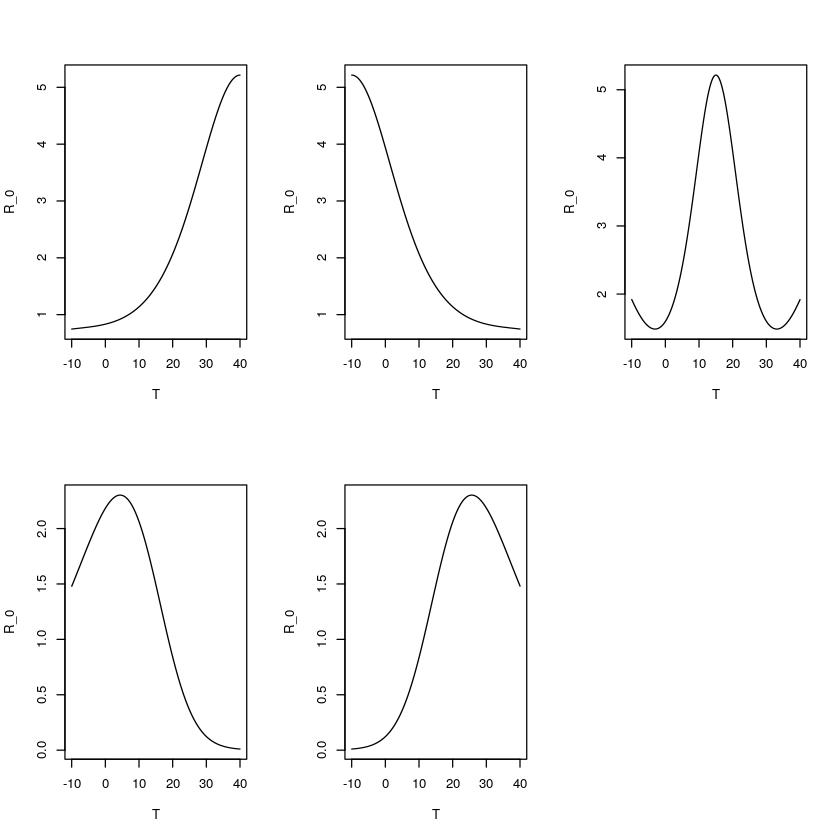

In [120]:
#plotting R0
par(mfrow = c(2, 3))
#d<- 0.25 / 24  #units -time(days)
h<-0.25 / 24 #days
epsilon=0.1 # maximum possibly transmissibility . not all contacts. eg in school
#k<- -30  #decay (1/day)
#c_r<-13 #individuals/individual/day  



mu = 0
sigma = 0.25
alpha = 0.005
gamma = 0.25

range = c(-10, 40)
T = seq(range[1], range[2] , length.out = 1000)
#completely susceptible population
#maxes is a matrix with different combinations of maximum for S, cr ,d 

maxes<-matrix(c(range[2],range[2],range[2],range[1],range[1],range[1],
                range[1] +((range[2] - range[1]) / 2), range[1] + ((range[2] - range[1]) / 2),range[1] + ((range[2] - range[1]) / 2),
                range[1],range[2],range[2],
                range[2],range[1],range[1]),byrow=T, nrow=5,ncol=3)
for (a in 1:nrow(maxes)){
    duration<-d(temp_at_max = maxes[a,3],range = range, T=T)
    contact_rate<-cr(T = T,m =c(maxes[a,2],meancontactno) ,s=sqrt(varcontactno)*3)
    growth<-S(temp_at_max = maxes[a,1],range = range, T=T)
    #print(duration)
    #print(contact_rate)
    #print(growth)
    beta = ( ( exp ( growth * duration * ( duration / ( h + duration ) ) ) ) *   epsilon   * contact_rate)
    R_0 <-(sigma / (sigma + mu)) * beta/(mu + alpha + gamma)
    plot(T, R_0, type = "s")
}

#third and 5th parameters used fur simulations further down

#1 all peak at high temperature
#2 all peak at low temperature
#3 all peak in midrange
#4 S peaks low, behaviour peaks high
#5 S peaks high, behaviour peaks low 

In [121]:
require("epimdr")

[1] "complete match (midrange)"
[1] "complete mismatch (C max temperature is high, S max temperature is low )"


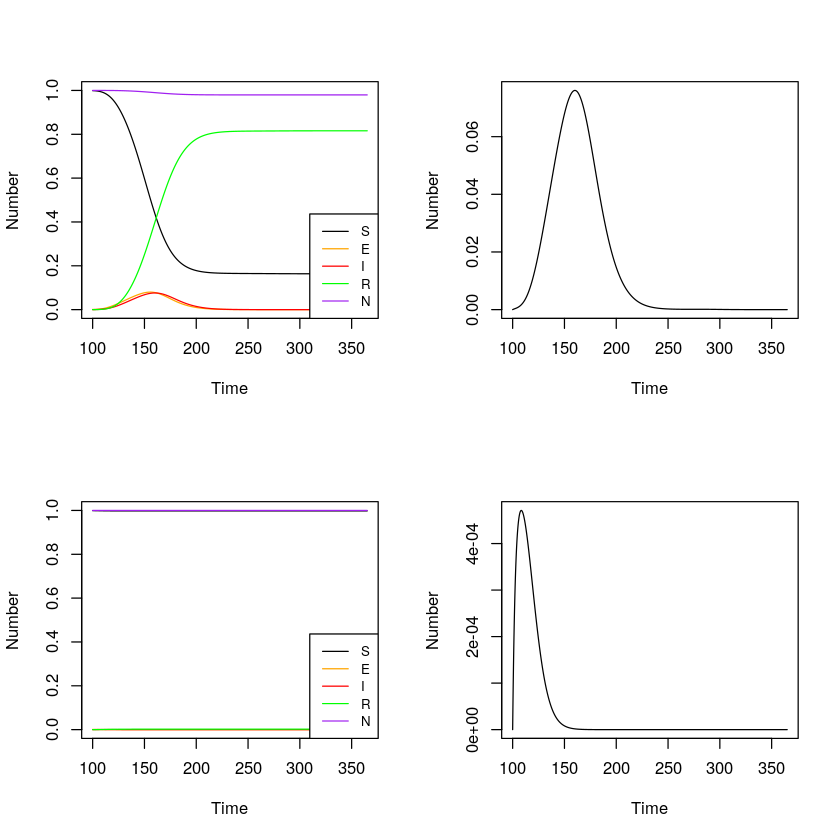

In [122]:
Temp<- function(time,min,max) {
  # here, T is varying with time at a yearly cycle.
  return((max-min)/2 * cos((2 * pi / 365)* time - pi) + (max+min)/2)
}
#T<-seq(0,400,length.out = 1000)
#Y<-Temp(T,-10,40)
#plot(T,Y)
model <- function(time, values, parms) {
   #function where c changes with the climate and humidity at each timepoint
  
   #initial values
   S <- values[1]
   E <- values[2]
   I <- values[3]
   R <- values[4]
  
   #parameters
   mu <- parms[["mu"]]
   sigma <- parms[["sigma"]]
   alpha <- parms[["alpha"]]
   gamma <- parms[["gamma"]]
   h <- parms[["h"]]
   epsilon <- parms[["epsilon"]]
   range <-parms[["range"]]
   nu <- parms[["nu"]]
   N <- parms[["N"]]
   mismatch <- parms[["mismatch"]]

   #find temperature given time
   T <- Temp(time=time,min=range[1],max=range[2])
   
   #find beta given temperature
   #2 options- mismatch=1 is when completely opposite maxima. =1, both peak at mid value
   if (mismatch==1){
       duration<-d(temp_at_max = maxes[4,3],range = range, T=T)
       contact_rate<-cr(T = T,m =c(maxes[4,2],meancontactno) ,s=sqrt(varcontactno)*3)
       growth<-S(temp_at_max = maxes[4,1],range = range, T=T)      
      }else{
         duration<-d(temp_at_max = maxes[3,3],range = range, T=T)
         contact_rate<-cr(T = T,m =c(maxes[3,2],meancontactno) ,s=sqrt(varcontactno)*3)
         growth<-S(temp_at_max = maxes[3,1],range = range, T=T)
      }



    beta = ( ( exp ( growth * duration * ( duration / ( h + duration ) ) ) ) *   epsilon   * contact_rate)
   #seir model
   dS = nu * N - beta * I * S / N - mu * S 
   dE = beta * S * I / N - (sigma + mu) * E
   dI = sigma * E - (alpha + mu + gamma) * I
   dR = gamma * I - mu * R 
    
  list(c(dS, dE, dI, dR))
}



plottime <- function(start, time, model, parms) {
   #plotting seir components over time
   out = ode(    y = start,    time = time,    func = model,    parms = parms  )
   Nvec<-out[, "S"] + out[, "E"] + out[, "I"] + out[, "R"]
   out<-cbind( out, Nvec)
   plot(x = out[, "time"], y= out[, "S"], ylab = "Number", xlab = "Time",
        type = "l", xlim=c(min(time), max(time)),ylim=c(0, parms[["N"]]))
   lines(x = out[, "time"],y= out[, "E"], col = "orange")
   lines(x = out[, "time"],y= out[, "I"], col = "red")
   lines(x = out[, "time"],y= out[, "R"], col = "green")
   lines(x = out[, "time"],y= out[, "Nvec"], col = "purple")  
   legend( "bottomright",legend = c("S", "E", "I", "R","N"), 
          col = c("black", "orange", "red", "green","purple"), lty = 1, cex = 0.8)
    #plotting infection numbers over time
    plot(x = out[, "time"],   y= out[, "I"],    ylab = "Number",   xlab = "Time",    
       type = "l",   xlim=c(min(time), max(time)),  ylim=c(0, max(out[,"I"]))) }

time = seq(100,365, by = 0.01)

par(mfrow = c(2, 2))

#2 simulations- only difference is mismatch
#these simulations are using graphs of  duration and mortality determined by earlier functions- Specifically S and R
parms1 = list( mu = 00.000,sigma = 0.2 ,alpha = 0.005, gamma =0.2,
               N = 1, nu = 0.0, range = c(-10,40), mismatch=0, h=0.25 / 24 ,epsilon= 0.1)
print("complete match (midrange)")

start = c(S = 0.999*parms1[["N"]],
          E = 0.001*parms1[["N"]],
          I = 0.00*parms1[["N"]],
          R = 0*parms1[["N"]])
plottime(time = time,parms = parms1,start = start,  model = model)



parms2 = list( mu = 00.000, sigma = 0.2 , alpha = 0.005,  gamma =0.2,
              N = 1, nu = 0.0, range = c(-10,40), mismatch=1, h=0.25 / 24 ,epsilon= 0.1)
print("complete mismatch (C max temperature is high, S max temperature is low )")
start = c(S = 0.999*parms2[["N"]],
          E = 0.001*parms2[["N"]],
          I = 0.00*parms2[["N"]],
          R = 0*parms2[["N"]])
plottime(time = time,parms = parms2,start = start,model = model)
